# EXPLORATORY DATA ANALYSIS - RETAIL

### TASK
***Perform Exploratory Data Analysis on dataset 'SampleSuperstore'***

**Author:** Jaweria Niaz Mughal

## STEP-01: Importing and Analyzing Dataset

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset
dataset = pd.read_csv("F:\\Data science\\GRIP Insternship\\Task-03\\SampleSuperstore.csv")
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [3]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
print(dataset.isnull().sum(axis=0))

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


## STEP-02: Exploratory Data Analysis

<h3><u>ANALYZING SALES AND PROFIT</u></h3>

***VISUALIZING SUB-CATEGORIES DISTRIBUTION W.R.T CATEGORIES***

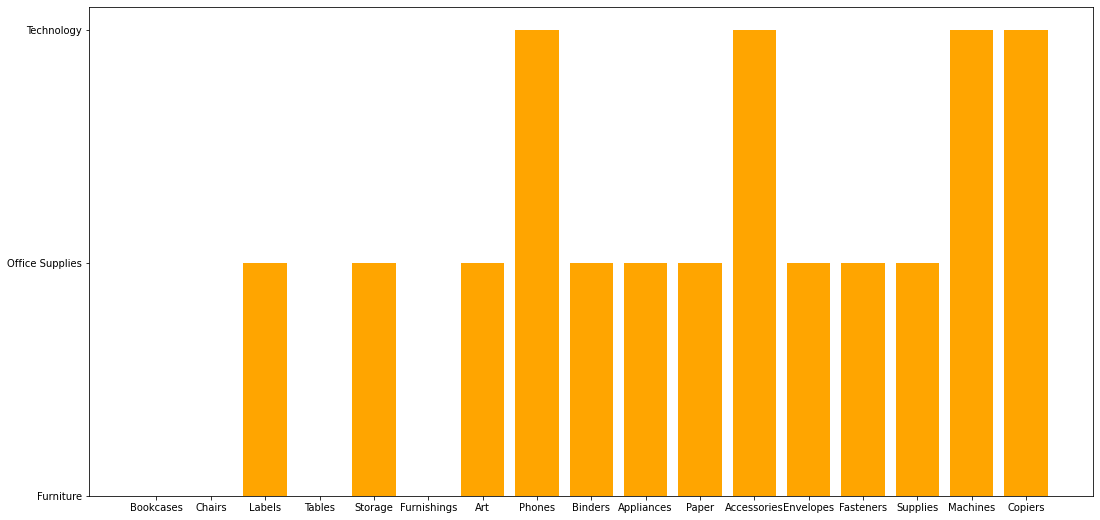

In [52]:
plt.figure(figsize=(18,9))
plt.bar('Sub-Category', 'Category', data=dataset, color='orange')
plt.show()

In [12]:
# Importing plotly - to make some advance visualizations
%pip install plotly
import plotly.express as px

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=cd74c4a955bf1628433ff5e42ae2daeaafa151026a1472351ef6ad1918347daa
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


***ANALYZING THE PRODUCTS AT SUB-CATEGORY LEVELS***

In [55]:
fig = px.sunburst(dataset, path=['Country', 'Category','Sub-Category'], values='Sales', color='Category',hover_data=['Sales','Quantity','Profit'])
fig.update_layout(height=600,title_text='Product Categories & Sub-Categories')
fig.show()

***FINDING TOTAL SALES AND TOTAL PROFIT STATE-WISE***

<ipython-input-38-798eedf5a907>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



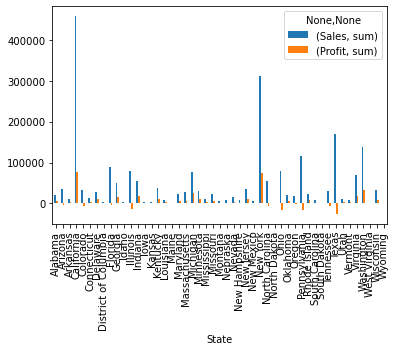

In [38]:
# plt.figure(figsize=(15,8))
X = dataset.groupby('State')['Sales','Profit'].agg(['sum']).plot.bar()


***FINDING TOTAL SALES AND TOTAL PROFIT IN COUNTRY***

In [26]:
df_country = dataset.groupby('Country')['Sales','Profit'].agg(['sum'])
df_country.columns=['Sales','Profit']
df_country

<ipython-input-26-a33320e6af1c>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Sales,Profit
Country,,
United States,2.297201e+06,286397.0217


***FINDING THE PERCENTAGE-WISE SALES OF SUB-CATEGORIES OF ALL PRODUCTS USING PIECHART***

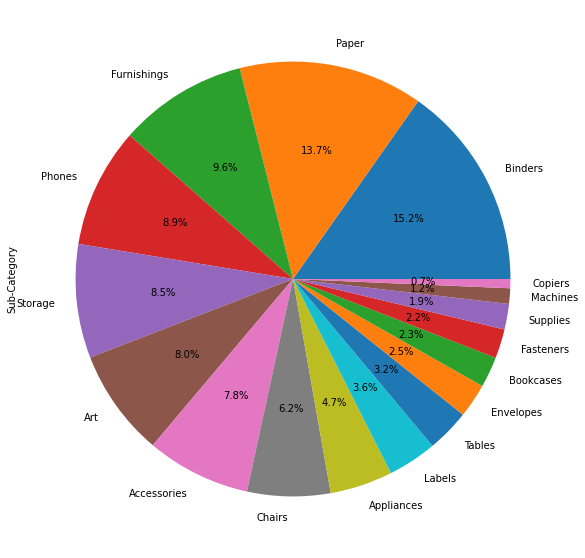

In [14]:
plt.figure(figsize=(12,10))
dataset['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

***VISUALIZING PROFIT/LOSS OF EACH STATE***

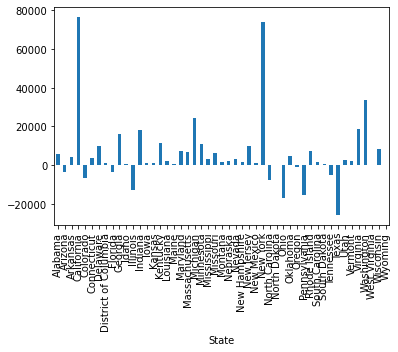

In [27]:
df_top_state = dataset.groupby('State')['Profit'].agg('sum').plot.bar()

***FINDING TOP 5 SUB-CATEGORY NAME AND THEIR SALES***

In [42]:
# Getting top 5 selling sub-category
product=[]
for i in dataset['Sub-Category'].unique():
    product.append([i,round(dataset[dataset['Sub-Category'] == i]['Sales'].sum(),2)])
    
top_5 = pd.DataFrame(product, columns=['Sub-Category','Sales'])
top_5.sort_values('Sales',ascending=False).head().fillna(0).style.background_gradient(cmap='Greens',subset=['Sales'])

,Sub-Category,Sales
7,Phones,330007.050000
1,Chairs,328449.100000
4,Storage,223843.610000
3,Tables,206965.530000
8,Binders,203412.730000


<h3><u>ANALYZING CUSTOMERS</u></h3>

In [43]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


***ANALYZE SALES FROM EACH CUSTOMER SEGMENT***

<ipython-input-45-c1fa1b85a918>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



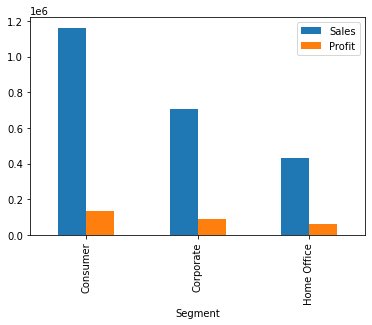

In [45]:
dataset.groupby('Segment')['Sales','Profit'].agg('sum').plot.bar()

***TOP 10 CITY FROM WHERE CUSTOMERS ORDERED FREQUENTLY***

In [57]:
top_10 = dataset['City'].value_counts().head(10)
top_10

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

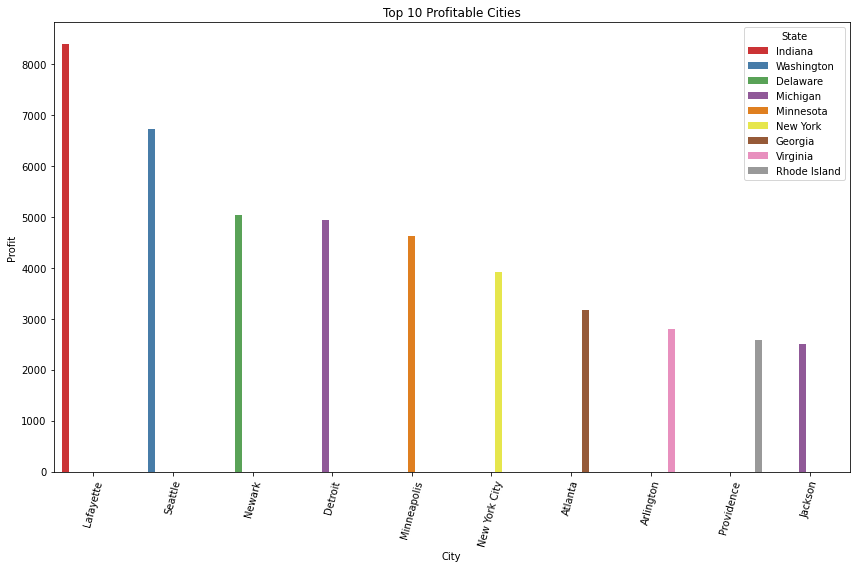

In [50]:
# Top 10 cities from where store made most of profit
import seaborn as sns
top_10 = dataset.sort_values(['Profit'], ascending=False).head(10)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='City', y='Profit', hue='State', palette='Set1', data=top_10, ax=ax)
ax.set_title("Top 10 Profitable Cities")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

***VISUALIZING PURCHASES OF EACH SEGMENT W.R.T EACH CATEGORY***

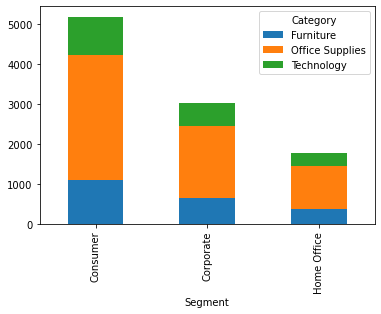

In [51]:
pd.crosstab(dataset['Segment'],dataset['Category']).plot(kind='bar',stacked=True)

<p><i><b>ANALYSIS ENDS HERE</b></i></p>